In [14]:
import os
os.chdir("../")
from data_processing import gamry_eis as geis
from data_processing import arbin_lbt
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from importlib import reload

## EIS Data

In [3]:
leaf_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Gamry Data/'
channel_numbers = (1,2,3,4,5,6,7,8)
eis_sweeps = []
for channel_number in channel_numbers:
    eis_sweep = geis.EisSweep(f'channel{channel_number}', 0.5)
    if channel_number < 5:
        eis_sweep.read_DTA_file(leaf_prepath + f'init_gen1_pack2_Chan00{channel_number}_Cycle001_Step013.DTA')
    else:
        eis_sweep.read_DTA_file(leaf_prepath + f'init_gen1_pack1_Chan00{channel_number}_Cycle001_Step013.DTA')
    eis_sweeps.append(eis_sweep)

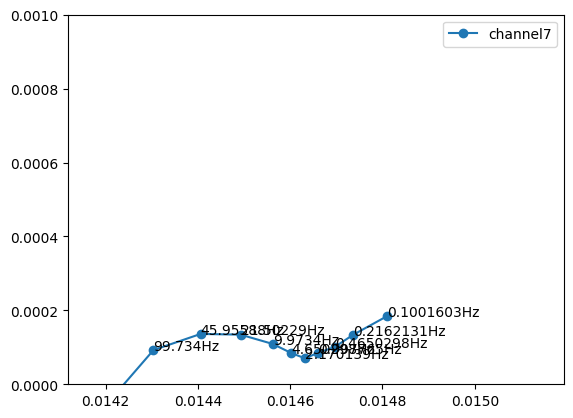

In [22]:
%matplotlib inline
def add_freq_labels(ax, freq, z_real, z_imag):
    for idx, freq in enumerate(freq):
        ax.annotate(f'{freq}Hz', (z_real[idx], z_imag[idx]))

fig = plt.figure()
ax = fig.add_subplot(111)

for sweep in eis_sweeps[-2:-1]:
    ax.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=sweep.name, marker='o')
    add_freq_labels(ax, sweep.freq, sweep.z_real, -1*np.array(sweep.z_imag))
# plt.xlim([0, 0.016])
plt.ylim([0, 0.001])
plt.legend()
plt.show();

In [19]:
folder_path = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Gamry Data csv/'
for channel_number, sweep in enumerate(eis_sweeps):
    sweep.get_data_as_dataframe().to_csv(
        folder_path +f'init_gen1_pack2_Chan00{channel_number}_Cycle001_Step013.csv',
        index=False
        )

## Cycling Data

In [5]:
arbin_lbt = reload(arbin_lbt)

In [2]:
def load_leaf_data(folder_path, steps, cell_builder) -> dict[int: arbin_lbt.ArbinCell]:
    cells = {}
    directory = os.fsencode(folder_path)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        cell_list = cell_builder.read_leaf_characterization_excel_data(folder_path+filename, steps=steps)
        for cell in cell_list:
            cells[cell.channel_number] = cell
    
    return cells

In [3]:
arbin_data_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/Battery Data/Leaf Arbin Data/'

main_directory = os.fsencode(arbin_data_prepath)
cell_builder = arbin_lbt.CellBuilder()
gen1_cells = {}
steps = [2,5,6,9,11,13,15,18,21,24]
for directory in os.listdir(main_directory):
    directory = os.fsdecode(directory)
    cells = load_leaf_data(arbin_data_prepath+directory+'/', {'characterization': steps}, cell_builder)
    gen1_cells.update(cells)
pack1_path = 'init_gen1_pack1_5_6_7_8/'

Channel_5_1
Channel_6_1
Channel_7_1
Global_Info
Processing test cycle 1
Processing test cycle 1
Processing test cycle 1
Channel_8_1
Global_Info
Processing test cycle 1
Channel_1_1
Channel_2_1
Channel_3_1
Global_Info
Processing test cycle 1
Processing test cycle 1
Processing test cycle 1
Channel_4_1
Global_Info
Processing test cycle 1


In [8]:
gen1_cells.keys()

dict_keys([5, 6, 7, 8, 1, 2, 3, 4])

In [23]:
def plot_cc_cv_step(feature: str):
    fig, ax = plt.subplots(1)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    color_idx = 0
    for channel, cell in gen1_cells.items():
        for cycle in cell:
            for step in cycle:
                if step.step_index == 5:
                    step_5 = step
                if step.step_index == 6:
                    cv_time = np.array(step["Step_Time(s)"]) + step_5["Step_Time(s)"][-1]
                    ax.plot(step_5["Step_Time(s)"], step_5[feature], color=colors[color_idx])
                    ax.plot(cv_time,step[feature], label=f'Channel {cell.channel_number}', color=colors[color_idx])
                    color_idx += 1
                    if color_idx < len(colors):
                        pass
                    else:
                        color_idx = 0
    plt.legend()
    plt.show();

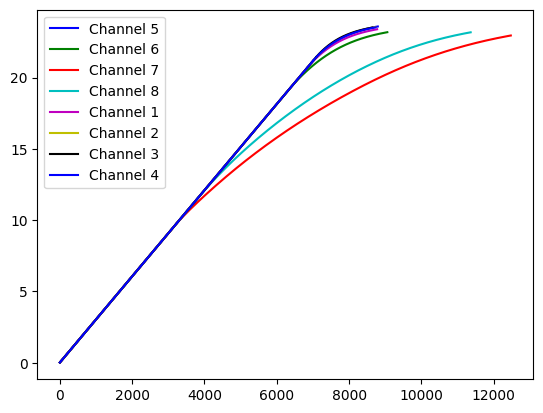

In [24]:
plot_cc_cv_step("Charge_Capacity(Ah)")

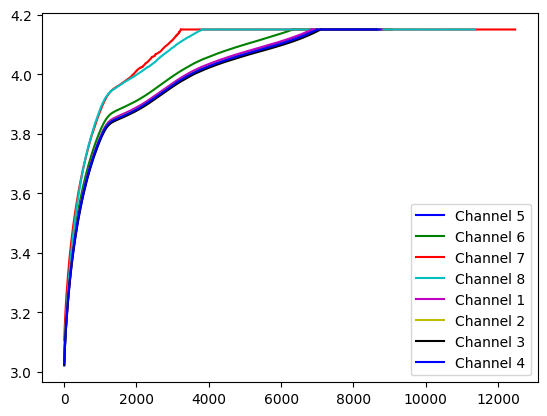

In [26]:
plot_cc_cv_step("Voltage(V)")

In [30]:
for channel, cell in gen1_cells.items():
    for cycle in cell:
        for step in cycle:
            if step.step_index == 15:
                print(f"Channel: {channel} DCIR {step['Internal Resistance(Ohm)']}")

Channel: 5 DCIR [0.0034963805228471756]
Channel: 6 DCIR [0.006923919077962637]
Channel: 7 DCIR [0.0035594250075519085]
Channel: 8 DCIR [0.0074150776490569115]
Channel: 1 DCIR [0.0034854926634579897]
Channel: 2 DCIR [0.003189890878275037]
Channel: 3 DCIR [0.0026112119667232037]
Channel: 4 DCIR [0.003127485513687134]


In [28]:
gen1_cells[1].cycles[0].steps[0].data_dict.keys()

dict_keys(['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'ACR(Ohm)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Battery_Temperature(C)'])